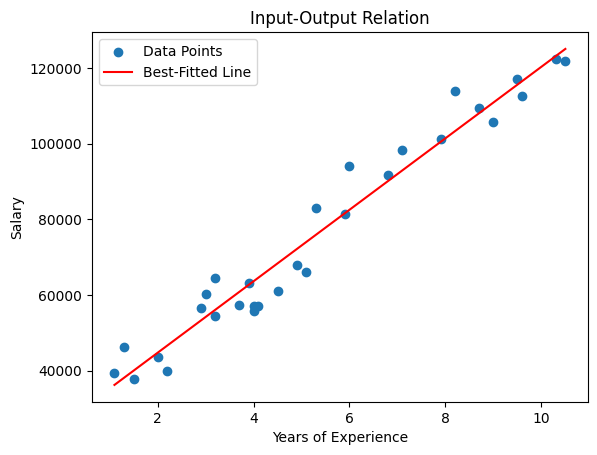

Best-Fitted Line: m=9449.962321455077, c=25792.200198668685


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('Salary_Data.csv', delimiter=',', names=True)
X = data['YearsExperience']
Y = data['Salary']

n = len(X)
sum_X = np.sum(X)
sum_Y = np.sum(Y)
sum_XY = np.sum(X * Y)
sum_X_sq = np.sum(X**2)
sum_X_sq_total = sum_X**2

m = (n * sum_XY - sum_X * sum_Y) / (n * sum_X_sq - sum_X_sq_total)
c = (sum_Y - m * sum_X) / n

# Task 1: Plot the input-output relation
plt.scatter(X, Y, label='Data Points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Input-Output Relation')

# Task 2: Design a mathematical function for the best-fitted line
X_range = np.linspace(min(X), max(X), 100)
Y_bestfit = m * X_range + c
plt.plot(X_range, Y_bestfit, color='red', label='Best-Fitted Line')

plt.legend()
plt.show()

print(f'Best-Fitted Line: m={m}, c={c}')


Alpha=0.01: m=0.9584905739527009, c=1.4493318858137412, Error=2.1754279394711578
Alpha=0.1: m=142854.74999999517, c=-833320.8333333205, Error=116209737052.14856
Alpha=0.5: m=-631967.25, c=-155208.75, Error=12986483819184.938
Alpha=1: m=-1738969.0, c=-1522059.0000000002, Error=119505337491572.25


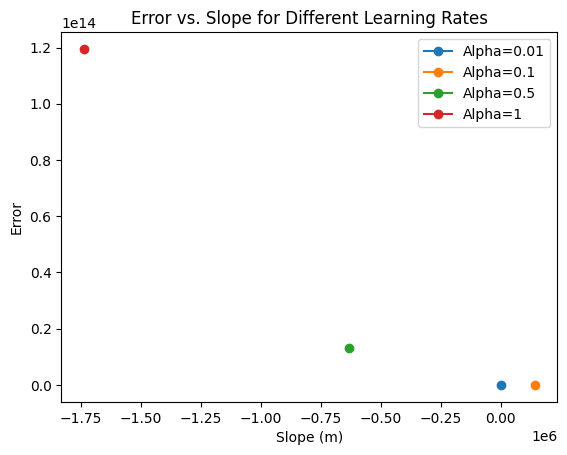

Global Minima: m=0.9584905739527009, c=1.4493318858137412, Minimum Error=2.1754279394711578


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_task3 = np.array([2, 4, 6, 8])
Y_task3 = np.array([3, 7, 5, 10])

# Task 3: Find global minima and plot Error vs. Slope graph for different learning rates
learning_rates = [0.01, 0.1, 0.5, 1]
epochs = 1000

def linear_regression(X, Y, epochs, learning_rate):
    m, c = 0, 0
    n = len(X)

    for epoch in range(epochs):
        Y_pred = m*X + c
        error = (1/n) * np.sum((Y_pred - Y)**2)

        m_gradient = (2/n) * np.sum(np.clip(X * (Y_pred - Y), -1e6, 1e6))
        c_gradient = (2/n) * np.sum(np.clip(Y_pred - Y, -1e6, 1e6))

        m -= learning_rate * m_gradient
        c -= learning_rate * c_gradient

    return m, c

min_error = float('inf')
min_m = None
min_c = None

for alpha in learning_rates:
    m, c = linear_regression(X_task3, Y_task3, epochs, alpha)
    Y_pred = m*X_task3 + c
    error = (1/len(X_task3)) * np.sum((Y_pred - Y_task3)**2)

    print(f'Alpha={alpha}: m={m}, c={c}, Error={error}')

    plt.plot(m, error, marker='o', label=f'Alpha={alpha}')

    if error < min_error:
        min_error = error
        min_m = m
        min_c = c

plt.xlabel('Slope (m)')
plt.ylabel('Error')
plt.title('Error vs. Slope for Different Learning Rates')
plt.legend()
plt.show()

print(f'Global Minima: m={min_m}, c={min_c}, Minimum Error={min_error}')
